<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"><h1>Visualization for Science</h1>
<h1>Color Blindness</h1>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Set default figure size

In [2]:
plt.rcParams['figure.figsize'] = (12.8, 8.8)

Let's take a look at how we can manipulate images. Let's start by reading a JPG image file:

In [3]:
import matplotlib.image as mpimg
img = mpimg.imread('https://raw.githubusercontent.com/DataForScience/DataViz/master/data/cambodja.jpg', 
                 format='jpg')

Which we can easily plot using **imshow**

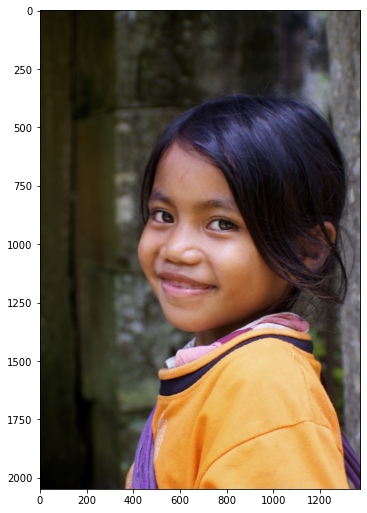

In [4]:
plt.imshow(img)

It's very useful to keep in mind that images are just arrays of numbers.

In [5]:
print(img.dtype, img.shape)

uint8 (2048, 1371, 3)


In this image we have 3 layers (one for each R, G, and B channels). We can take a look at each channel separately:

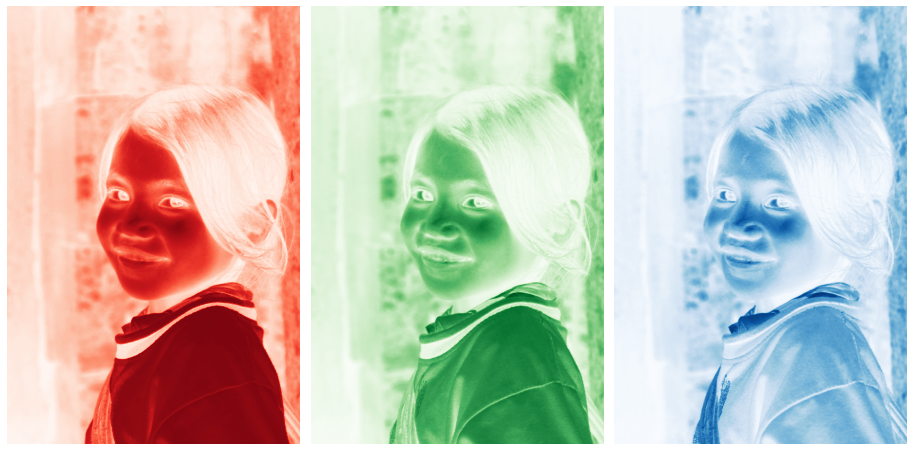

In [6]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img[:,:,0], cmap=plt.get_cmap('Reds'))
axs[0].set_axis_off()

axs[1].imshow(img[:,:,1], cmap=plt.get_cmap('Greens'))
axs[1].set_axis_off()

axs[2].imshow(img[:,:,2], cmap=plt.get_cmap('Blues'))
axs[2].set_axis_off()

fig.tight_layout()

Here, for clarity we are using **set_axis_off()** to remove ticks, labels, etc

Since images are just arrays, we can manipulate them as such. Let's start by defining some useful transformation matrices that transform the colors in a way similar to the various kinds of color blindness (after https://github.com/MaPePeR/jsColorblindSimulator/blob/master/colorblind.js).

In [7]:
ColorMatrixMatrixes = {
 'Achromatomaly': np.array([[61.8, 32, 6.2],
                            [16.3, 77.5, 6.2],
                            [16.3, 32, 51.6]])/100,

 'Achromatopsia': np.array([[29.9, 58.7, 11.4],
                            [29.9, 58.7, 11.4],
                            [29.9, 58.7, 11.4]])/100,

 'Deuteranomaly': np.array([[80, 20, 0],
                            [25.833, 74.167, 0],
                            [0, 14.167, 85.833]])/100,

 'Deuteranopia': np.array([[62.5, 37.5, 0],
                           [70, 30, 0],
                           [0, 30, 70]])/100,

 'Normal': np.array([[100, 0, 0],
                     [0, 100, 0],
                     [0, 0, 100]])/100,

 'Protanomaly': np.array([[81.667, 18.333, 0],
                          [33.333, 66.667, 0],
                          [0, 12.5, 87.5]])/100,

 'Protanopia': np.array([[56.667, 43.333, 0],
                         [55.833, 44.167, 0],
                         [0, 24.167, 75.833]])/100,

 'Tritanomaly': np.array([[96.667, 3.333, 0],
                          [0, 73.333, 26.667],
                          [0, 18.333, 81.667]])/100,

 'Tritanopia': np.array([[95, 5, 0],
                         [0, 43.333, 56.667],
                         [0, 47.5, 52.5]])/100
 }

With these transformation matrices we can easily manipulate the image to observe the effect of the different types of color blindness:

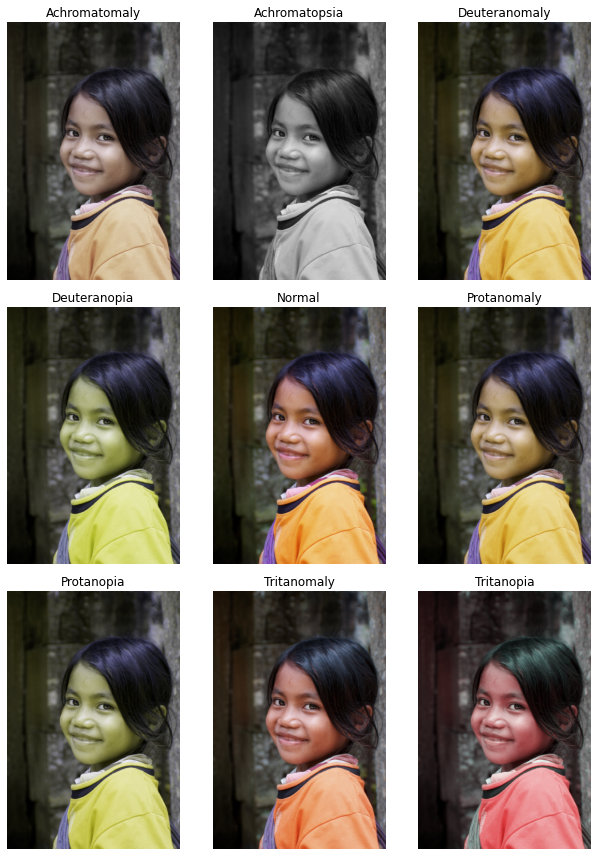

In [8]:
fig, axs_lst = plt.subplots(3, 3, sharex=True, sharey=True)

axs_lst = np.array(axs_lst).flatten()

# For each transformation matrix
for i, version in enumerate(sorted(ColorMatrixMatrixes.keys())):
    transformation = ColorMatrixMatrixes[version]
    
    # Turn the image into a matrix of 3 columns (color channels) 
    # and 2,807,808 rows (pixels)
    img_flat = img.reshape(img.shape[0] * img.shape[1], 3)
    
    # Apply the transformation matrix by multiplying it by each pixel
    new_img_array = np.dot(img_flat, transformation.T).astype(img.dtype)
    
    # Reshape the pixel array back into the original image shape
    new_img = new_img_array.reshape(img.shape)

    # Plot the transformed image in the appropriate location
    axs_lst[i].imshow(new_img)
    axs_lst[i].set_title(version)
    axs_lst[i].axis('off')

fig.subplots_adjust(hspace=0.1, wspace=0.1)

fig.set_size_inches(9, 12)
fig.tight_layout()

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/Graphs4Sci/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>